In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r'Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.shape

(891, 12)

In [10]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [14]:
df.sort_values(by="Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# This line fills the missing values in the “Age” column by replacing them with the median age
# calculated within each group of passengers that share the same “Pclass” and “Sex”.

df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [18]:
df['Age'].isnull().sum()

0

In [19]:
df.loc[df['Cabin'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [20]:
#  75% of data are missing
#  best solution is drop this column
df.drop(columns=['Cabin'],inplace=True)

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [22]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
# Embarked S is the most frequency

df['Embarked']=df['Embarked'].fillna('S')

In [24]:
# ticket ==0
# this incorect
df[df['Fare']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,40.0,0,0,112052,0.0,S


In [25]:
# the solution
df['Fare']=df.groupby(['Pclass'])['Fare'].transform(lambda x: x.replace(0,x.median()))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [28]:
df['Family_Size']=df['SibSp']+df['Parch']+1

In [29]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
)

In [30]:
df_survived=df[df['Survived']==1]['Survived']
df_died=df[df['Survived']==0]['Survived']

num_of_survived=len(df_survived)
num_of_died=len(df_died)
print(num_of_survived,num_of_died)

342 549


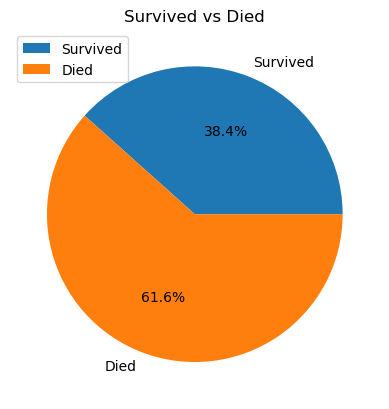

In [31]:
plt.pie([num_of_survived,num_of_died],labels=['Survived','Died'],autopct='%1.1f%%')
plt.title('Survived vs Died')
plt.legend()
plt.show()

# 38% of people Survived


In [32]:
df_men_Survived=df[(df['Sex']==1)&(df['Survived']==1)]['Name']
df_women_Survived=df[(df['Sex']==0)&(df['Survived']==1)]['Name']
print(len(df_men_Survived),len(df_women_Survived))

109 233


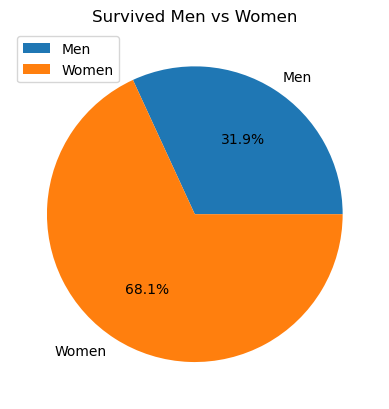

In [33]:
plt.pie([len(df_men_Survived),len(df_women_Survived)],labels=['Men','Women'],autopct='%1.1f%%')
plt.title('Survived Men vs Women')
plt.legend()
plt.show()

#31.9% of men servived
# 68.1% of women servived

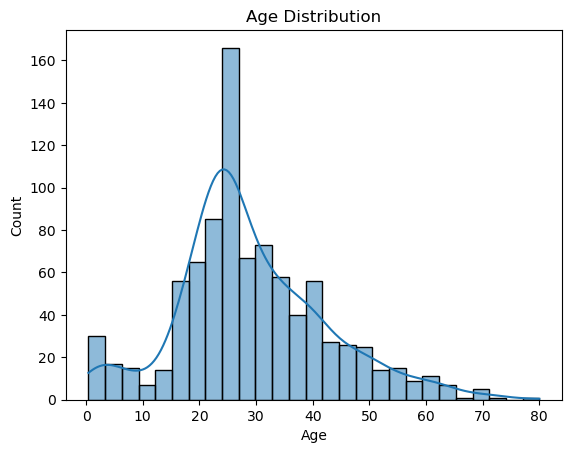

In [34]:
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')
plt.show()

# most poeple's age between 20 to 40

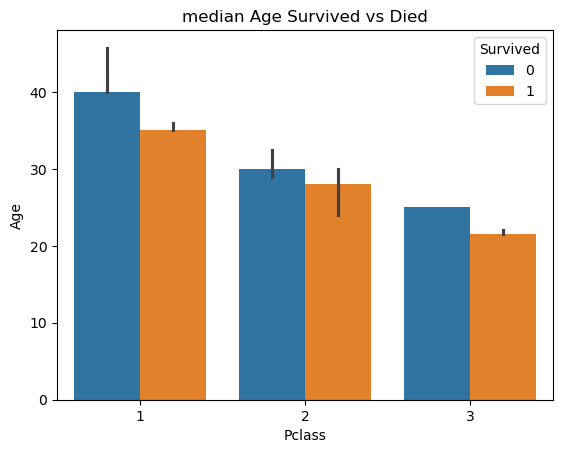

In [35]:
sns.barplot(data=df,x='Pclass',y='Age',hue='Survived',estimator='median')
plt.title('median Age Survived vs Died')
plt.show()

# younge people have a good chance to survive

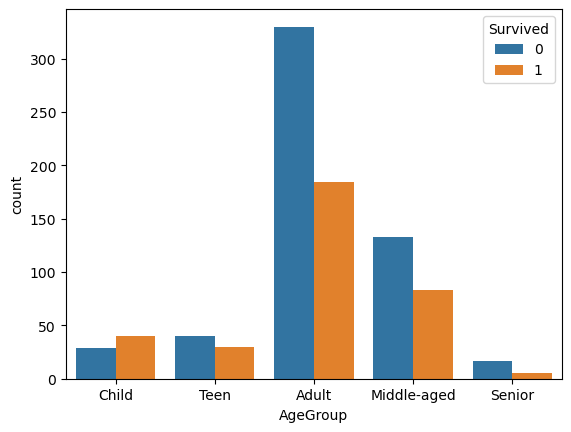

In [36]:
sns.countplot(data=df,x='AgeGroup',hue='Survived')
plt.show()

# this plot show numbers of peaple who survived and dead in any AgeGroup
#


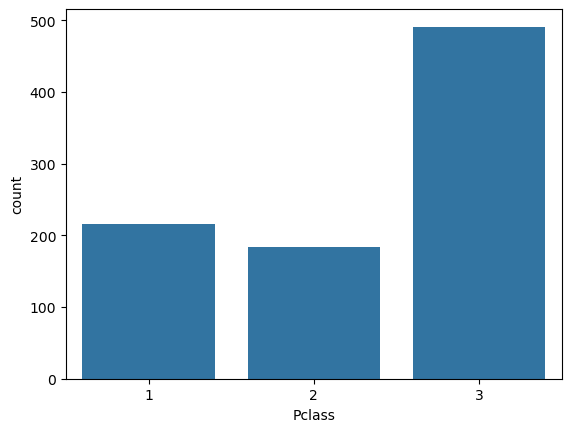

In [37]:
sns.countplot(x='Pclass',data=df)
plt.show()
# most people exist in pcalss 3

In [38]:
g_pclass_sur=df.groupby('Pclass')['Survived'].value_counts()
g_pclass_sur

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [39]:
pclass1_sur=df[(df['Pclass']==1)&(df['Survived']==1)]['Survived']
pclass2_sur=df[(df['Pclass']==2)&(df['Survived']==1)]['Survived']
pclass3_sur=df[(df['Pclass']==3)&(df['Survived']==1)]['Survived']

pclass1_died=df[(df['Pclass']==1)&(df['Survived']==0)]['Survived']
pclass2_died=df[(df['Pclass']==2)&(df['Survived']==0)]['Survived']
pclass3_died=df[(df['Pclass']==3)&(df['Survived']==0)]['Survived']

In [40]:
num_sur_pclass1=len(pclass1_sur)
num_sur_pclass2=len(pclass2_sur)
num_sur_pclass3=len(pclass3_sur)

num_died_pclass1=len(pclass1_died)
num_died_pclass2=len(pclass2_died)
num_died_pclass3=len(pclass3_died)

C:\Users\Student\AppData\Local\Temp\ipykernel_25904\3409790683.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Student\AppData\Local\Temp\ipykernel_25904\3409790683.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


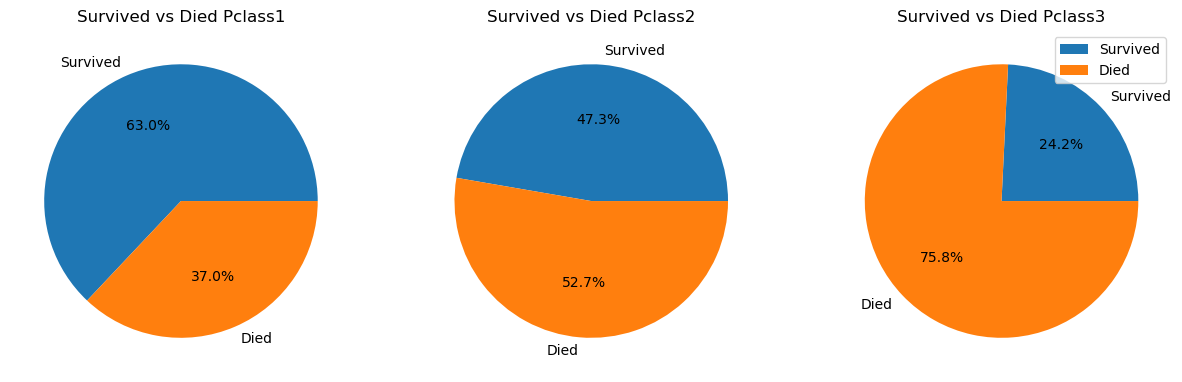

In [41]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

ax[0].pie([num_sur_pclass1,num_died_pclass1],labels=['Survived','Died'],autopct='%1.1f%%')
ax[0].set_title('Survived vs Died Pclass1')
plt.legend()

ax[1].pie([num_sur_pclass2,num_died_pclass2],labels=['Survived','Died'],autopct='%1.1f%%')
ax[1].set_title('Survived vs Died Pclass2')
plt.legend()

ax[2].pie([num_sur_pclass3,num_died_pclass3],labels=['Survived','Died'],autopct='%1.1f%%')
ax[2].set_title('Survived vs Died Pclass3')
plt.legend()
plt.show()


# most of people survived in pcalss 1


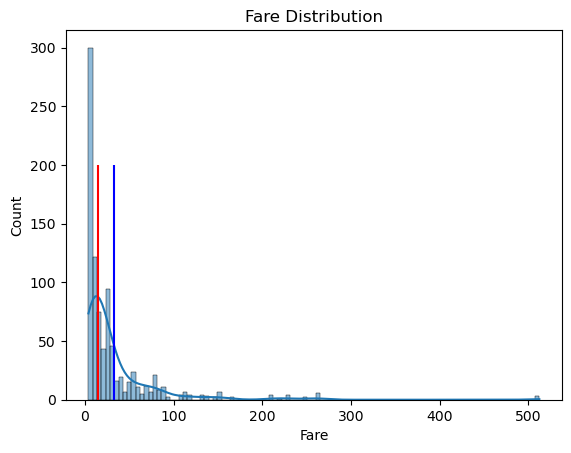

In [42]:
sns.histplot(df['Fare'],kde=True)
plt.title('Fare Distribution')
plt.vlines(df['Fare'].mean(),0,200,colors='b')
plt.vlines(df['Fare'].median(),0,200,colors='r')
plt.show()

# Distribution is right skewed"

In [43]:
df.groupby('Survived')['Fare'].median()

# there are relationship between fare and Survived

Survived
0    10.5
1    26.0
Name: Fare, dtype: float64

In [44]:
df.groupby('Pclass')['Fare'].median()

Pclass
1    60.73125
2    14.37500
3     8.05000
Name: Fare, dtype: float64

In [45]:
df['Family_Size'].agg(['min','max',])

min     1
max    11
Name: Family_Size, dtype: int64

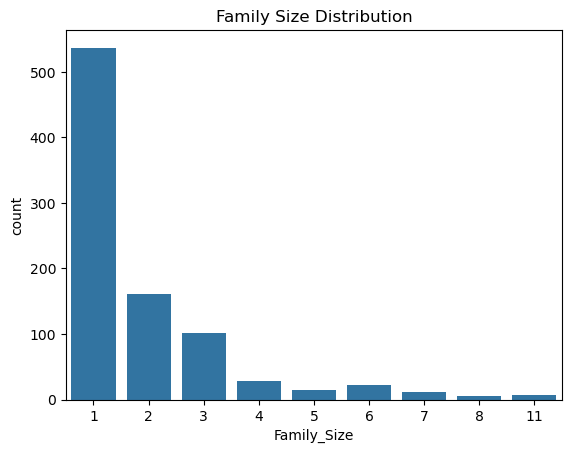

In [46]:
sns.countplot(data=df,x='Family_Size')
plt.title('Family Size Distribution')
plt.show()

In [47]:
famsize_sur_more_five=df.loc[(df['Survived']==1) & (df['Family_Size']>=5)]
famsize_sur_less_five=df.loc[(df['Survived']==1) & (df['Family_Size']<5)]

famsize_dead_more_five=df.loc[(df['Survived']==0) & (df['Family_Size']>=5)]
famsize_dead_less_five=df.loc[(df['Survived']==0) & (df['Family_Size']<5)]

num_sur_more_five=len(famsize_sur_more_five)
num_sur_less_five=len(famsize_sur_less_five)

num_dead_more_five=len(famsize_dead_more_five)
num_dead_less_five=len(famsize_dead_less_five)

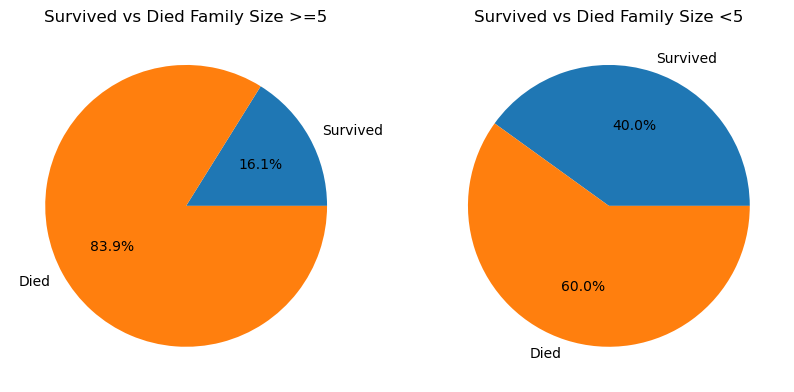

In [48]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].pie([num_sur_more_five,num_dead_more_five],labels=['Survived','Died'],autopct='%1.1f%%')
ax[0].set_title('Survived vs Died Family Size >=5')

ax[1].pie([num_sur_less_five,num_dead_less_five],labels=['Survived','Died'],autopct='%1.1f%%')
ax[1].set_title('Survived vs Died Family Size <5')
plt.show()

# 40% of people have less family survived
# 16% of people have more family survived

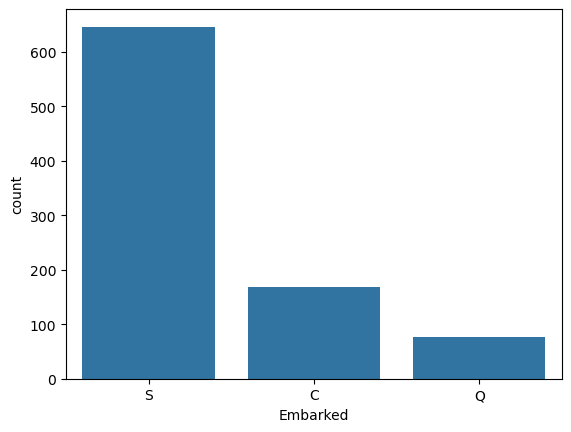

In [49]:
sns.countplot(data=df,x='Embarked')
plt.show()

In [50]:
df.pivot_table(index='Embarked',columns='Survived',values='Name',aggfunc='count',margins=True)


Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,219,646
All,549,342,891


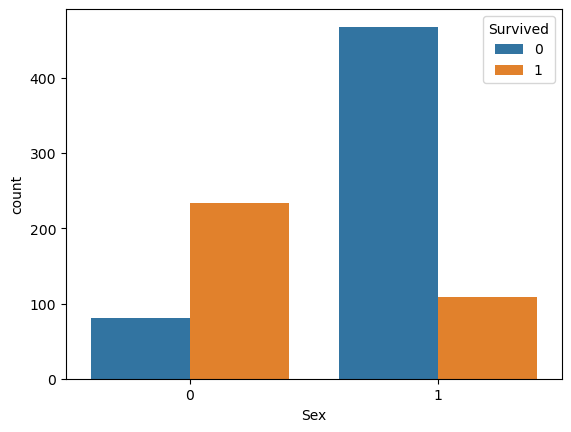

In [51]:
sns.countplot(data=df,x='Sex',hue='Survived')
plt.show()
# a lot of men dead


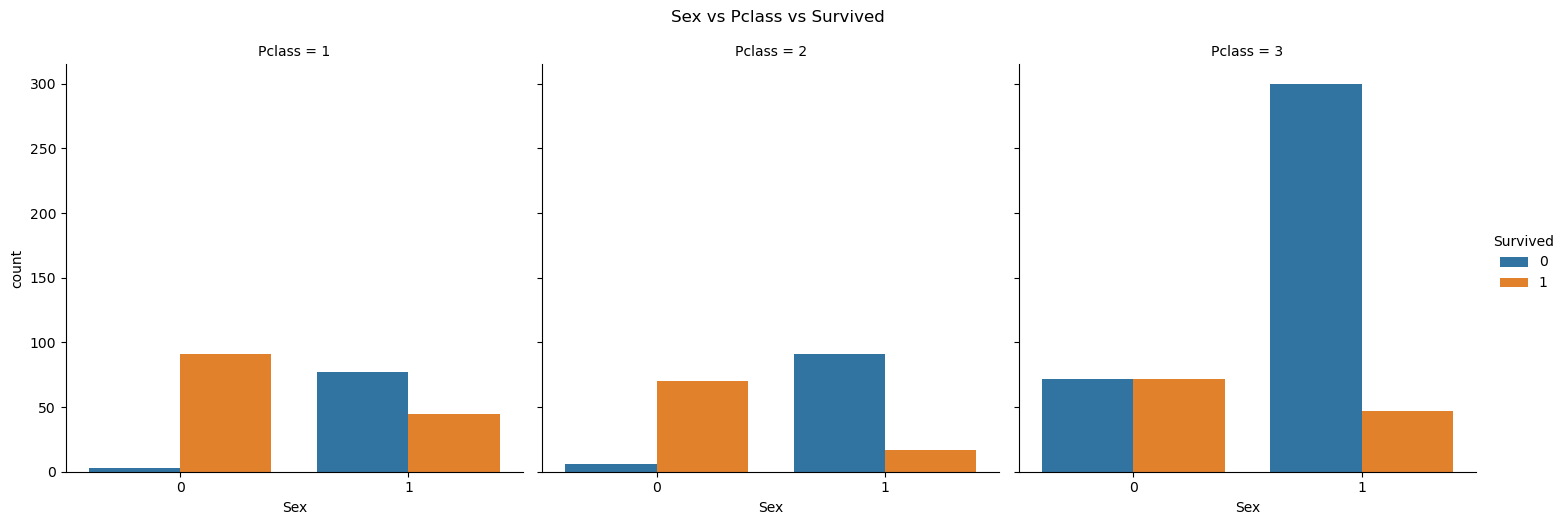

In [52]:
g=sns.catplot(data=df,x='Sex',col='Pclass',hue='Survived',kind='count')
g.fig.suptitle('Sex vs Pclass vs Survived',y=1.04)
plt.show()

# this plot indicates to numbers of men and women who survived in all classe

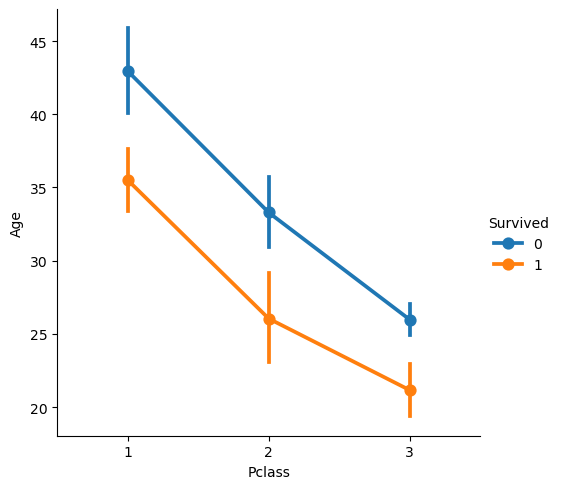

In [53]:
sns.catplot(data=df,x='Pclass',y='Age',kind='point',hue='Survived')
plt.show()

#this plot indicates to range of ages that survived and dead in all classe

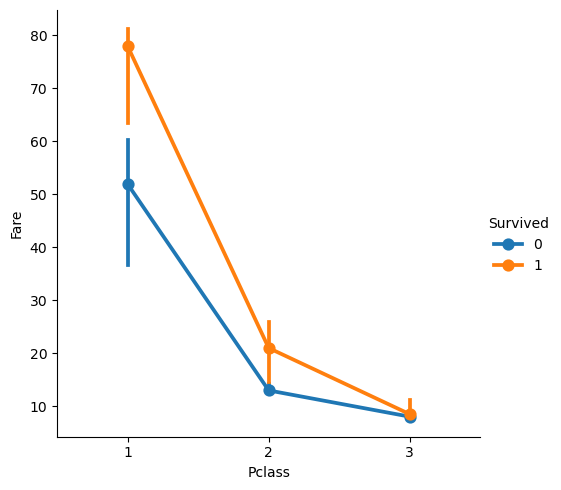

In [54]:
sns.catplot(data=df,x='Pclass',y='Fare',kind='point',hue='Survived',estimator='median')
plt.show()

#this plot indicates to range of fare that survived and dead in all classe

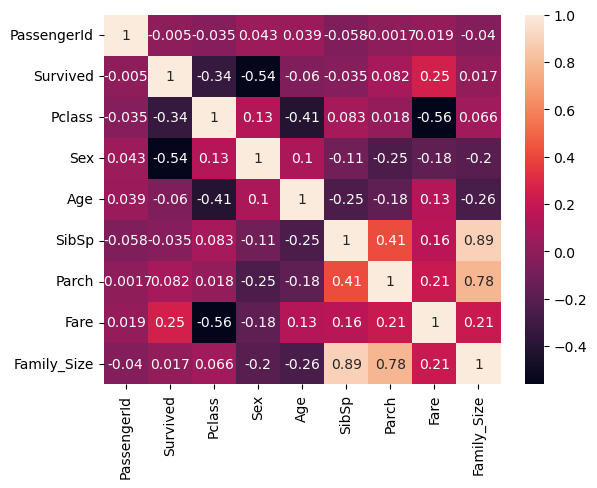

In [55]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

# this plot show correlation between numeric columns


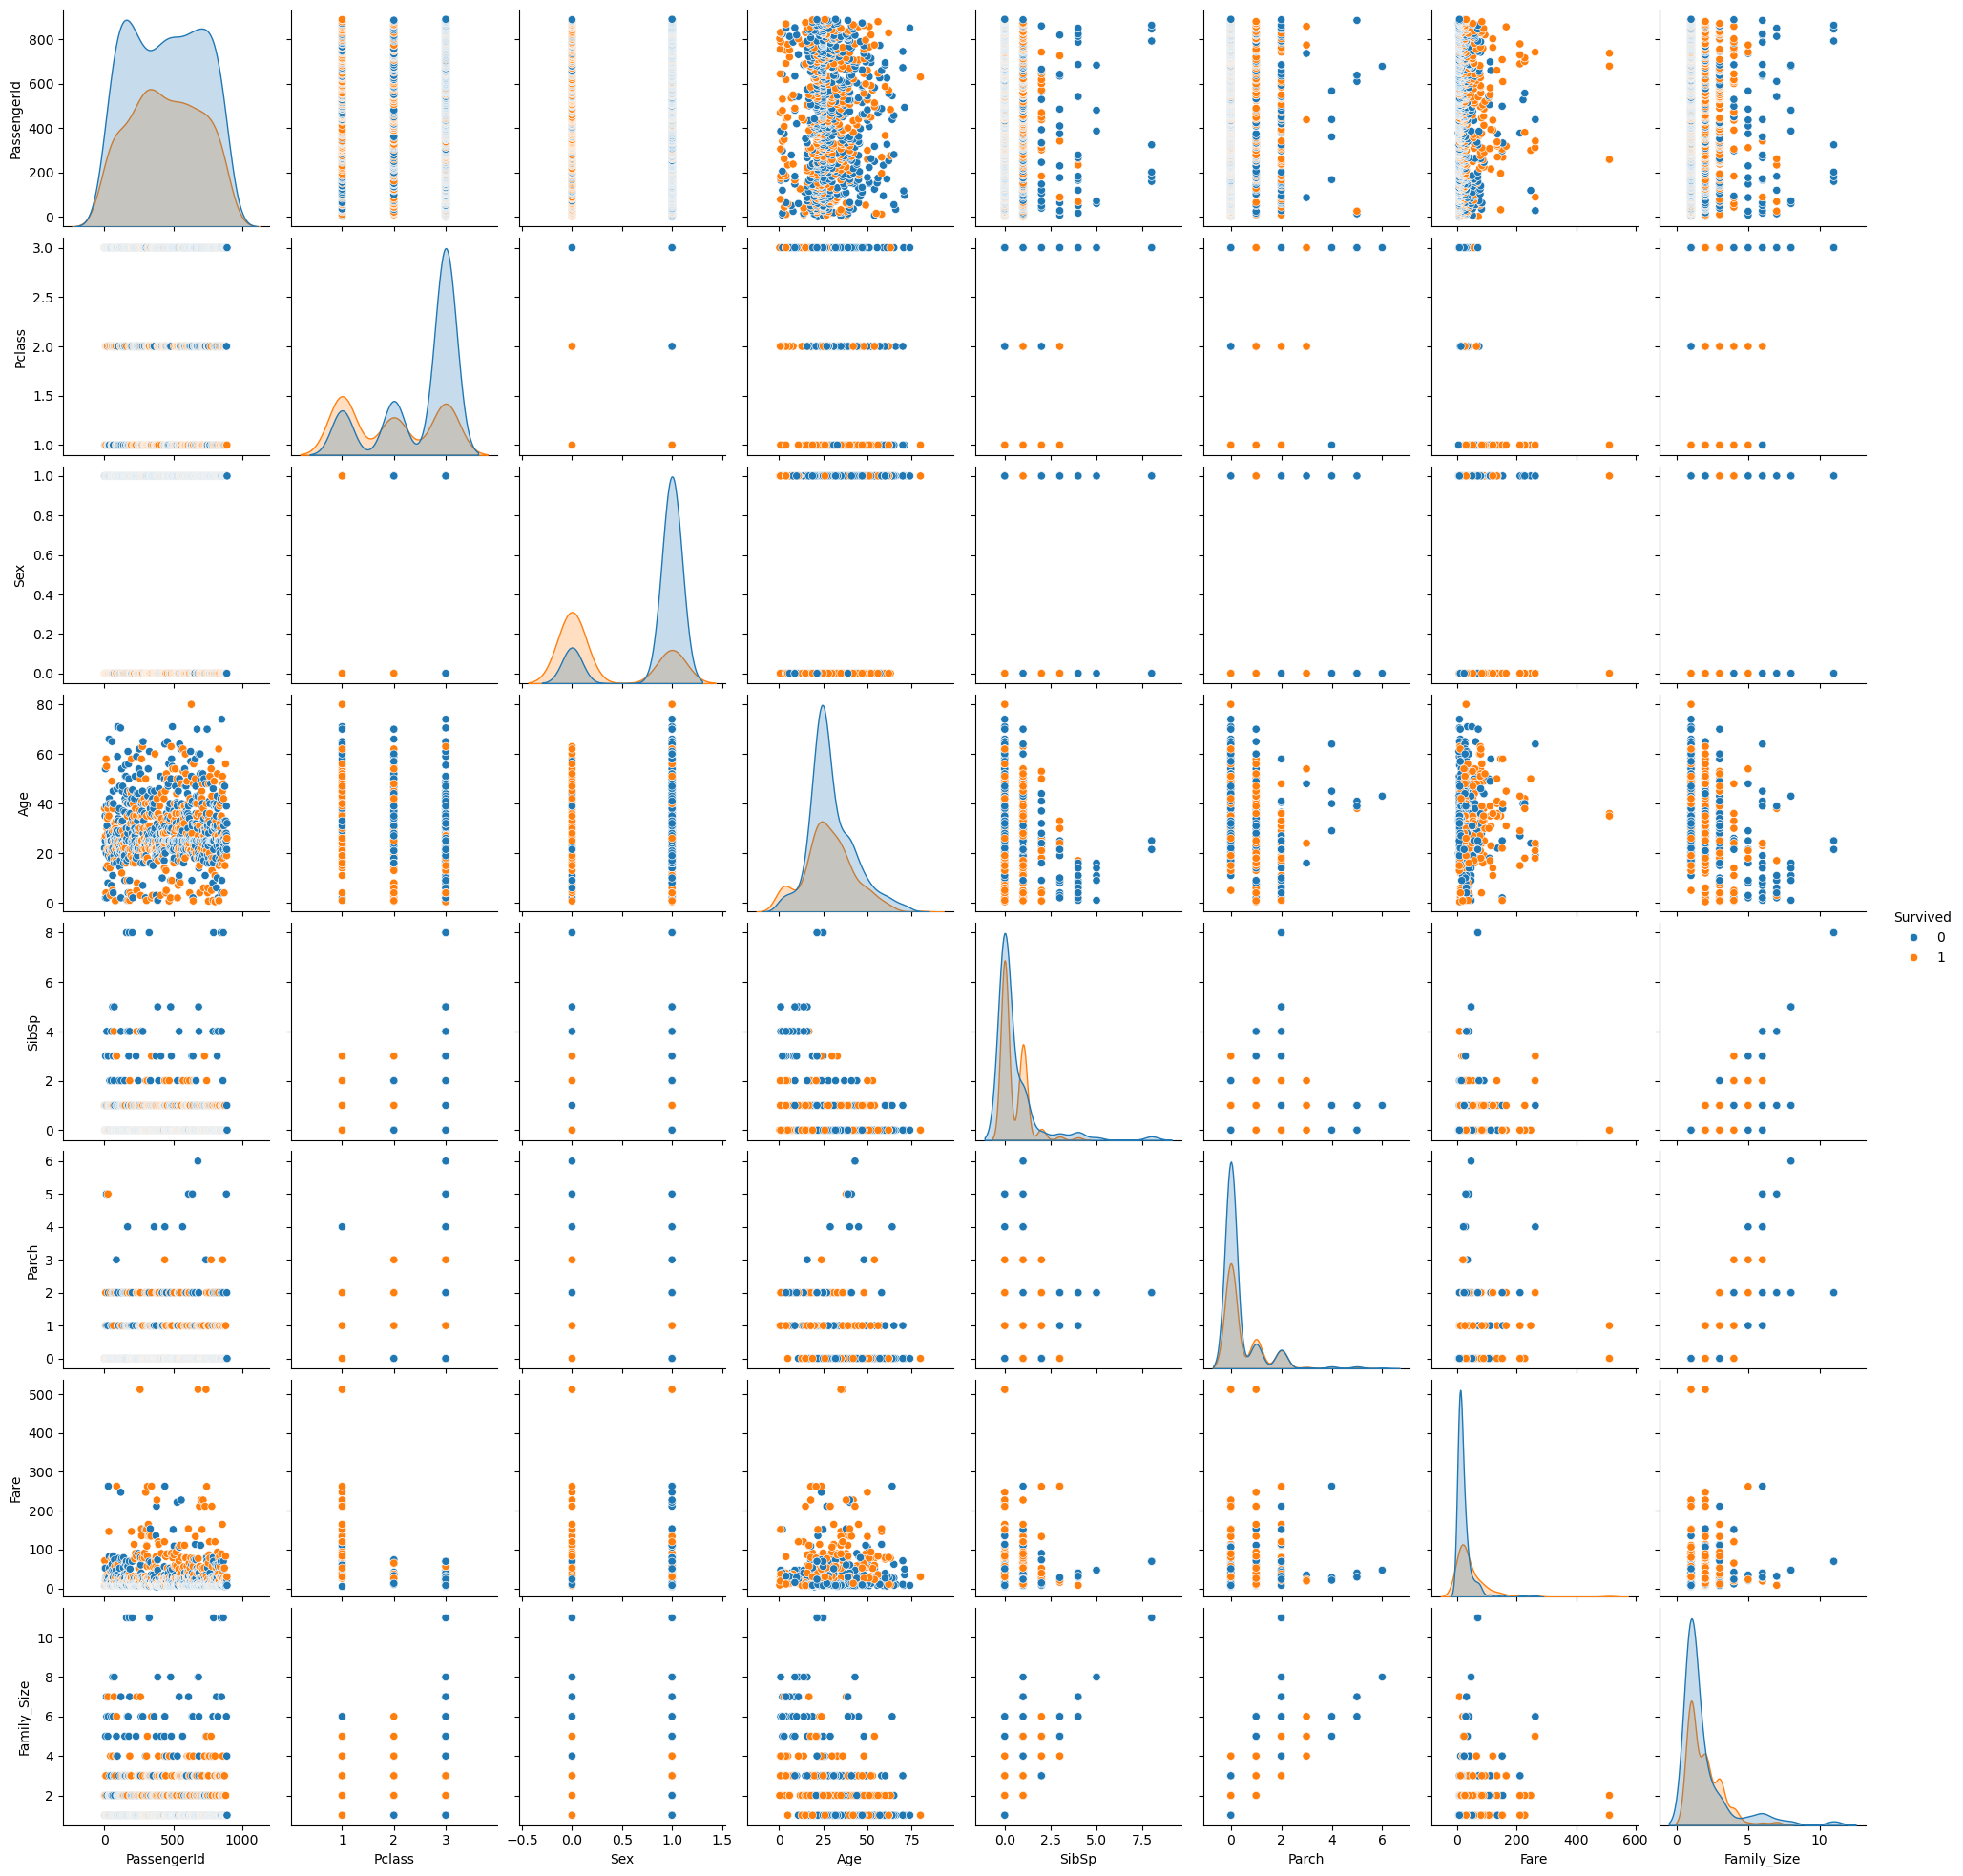

In [56]:
sns.pairplot(df,hue='Survived')
plt.show()

# this plot show relationship within columns

In [57]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.112424,0.523008,0.381594,32.674620,1.904602
std,257.353842,0.486592,0.836071,0.477990,13.304424,1.102743,0.806057,49.608084,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,1.000000
25%,223.500000,0.000000,2.000000,0.000000,21.500000,0.000000,0.000000,7.925000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.500000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [58]:
g1=df.groupby('Pclass')['Age'].get_group(1)
g2=df.groupby('Pclass')['Age'].get_group(2)
g3=df.groupby('Pclass')['Age'].get_group(3)

# g1 have ages of pclass 1
# g2 have ages of pclass 2
# g3 have ages of pclass 3

In [59]:
from scipy.stats import f_oneway

f_oneway(g1,g2,g3)

# alpha =0.05
# pvalue < alpha
# there is relationship between pclass and Age

F_onewayResult(statistic=93.2397105077518, pvalue=1.7514570200140448e-37)

In [60]:
g1=df.groupby('Survived')['Age'].get_group(0)
g2=df.groupby('Survived')['Age'].get_group(1)

# g1 have ages of Survived =0
# g2 have ages of Survived =1

f_oneway(g1,g2)

# alpha =0.05
# pvalue > alpha
# there is no relationship between Survived and Age

F_onewayResult(statistic=3.166925959744148, pvalue=0.07548530586358136)

In [61]:
g1=df.groupby('Survived')['Fare'].get_group(0)
g2=df.groupby('Survived')['Fare'].get_group(1)

# g1 have fares of Survived =0
# g2 have fares of Survived =1

f_oneway(g1,g2)

# alpha =0.05
# pvalue < alpha
# there is relationship between Survived and Fare

F_onewayResult(statistic=59.588509288079294, pvalue=3.140930008539495e-14)

In [62]:
men_women=pd.crosstab(df['Sex'],df['Survived'])
men_women

# this shows numbers of men and women who survived and dead

Survived,0,1
Sex,,
0,81,233
1,468,109


In [63]:
pclass_sur=pd.crosstab(df['Pclass'],df['Survived'])
pclass_sur

# this shows numbers of people who survived and dead in all classes

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [65]:
from scipy.stats import chi2_contingency

chi2_contingency(men_women)

# alpha =0.05
# pvalue < alpha
# there is relationship between Sex and Survived

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

In [66]:
men_women=pd.crosstab(df['Sex'],df['Survived'])
men_women

# this shows numbers of men and women who survived and dead

Survived,0,1
Sex,,
0,81,233
1,468,109


In [67]:
from scipy.stats import chi2_contingency

chi2_contingency(men_women)

# alpha =0.05
# pvalue < alpha
# there is relationship between Sex and Survived

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

In [68]:
pclass_sur=pd.crosstab(df['Pclass'],df['Survived'])
pclass_sur

# this shows numbers of people who survived and dead in all classes

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [69]:
chi2_contingency(pclass_sur)

# alpha =0.05
# pvalue < alpha
# there is relationship between Pclass and Survived

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

In [70]:
famsize_sur=pd.crosstab(df['Family_Size'],df['Survived'])
famsize_sur

# this shows family size who survived and dead

Survived,0,1
Family_Size,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


In [71]:
chi2_contingency(famsize_sur)

# alpha =0.05
# pvalue < alpha
# there is relationship between Family_Size and Survived
#

Chi2ContingencyResult(statistic=80.67231343783078, pvalue=3.579668975443533e-14, dof=8, expected_freq=array([[330.87878788, 206.12121212],
       [ 99.2020202 ,  61.7979798 ],
       [ 62.84848485,  39.15151515],
       [ 17.86868687,  11.13131313],
       [  9.24242424,   5.75757576],
       [ 13.55555556,   8.44444444],
       [  7.39393939,   4.60606061],
       [  3.6969697 ,   2.3030303 ],
       [  4.31313131,   2.68686869]]))

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  Family_Size  891 non-null    int64   
 12  AgeGroup     891 non-null    category
dtypes: category(1), float64(2), int64(7), object(3)
memory usage: 84.7+ KB
